In [ ]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Found GPU at: /device:GPU:0
Num GPUs Available:  1


In [ ]:
from tensorflow import keras
from keras.models import Sequential
from keras.utils import to_categorical
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
def show_img(img):
    plt.imshow(img)
    plt.axis("off")
def show_img_grid(img):
    plt.figure(figsize=(8, 8))
    for i in range(25):
        plt.subplot(5, 5, i+1)
        plt.imshow(img[i], cmap="gray")
        plt.axis("off")
    plt.show()

In [ ]:
def load_data():
    train = pd.read_csv("train.csv").to_numpy()
    test  = pd.read_csv("test.csv").to_numpy().reshape(-1, 28, 28)
    x_train, y_train = train[:, 1:].reshape(-1, 28, 28), train[:, 0]
    return x_train, y_train, test

In [ ]:
x_train, y_train, test = load_data()

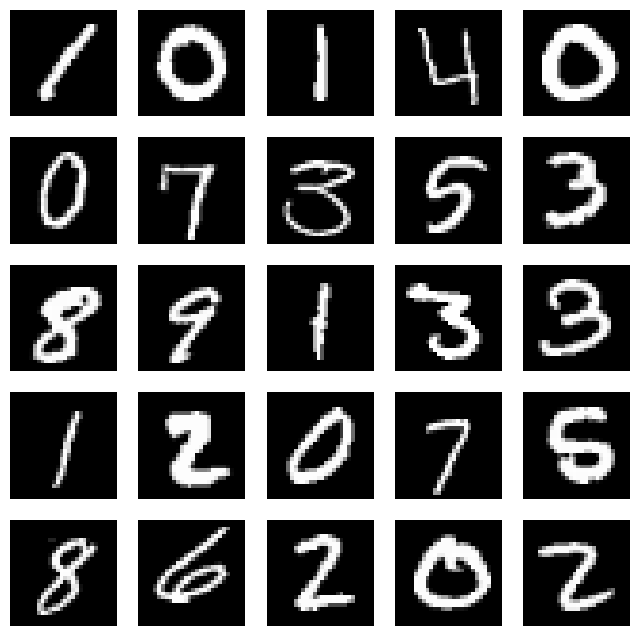

In [ ]:
show_img_grid(x_train)

In [ ]:
def pre_process():
    x_train, y_train, test = load_data()
    x_train = x_train.astype("float32") / 255
    test = test.astype("float32") / 255
    X_valid, X_train = x_train[:10000], x_train[10000:]
    y_valid, y_train = y_train[:10000], y_train[10000:]

    y_train, y_valid = to_categorical(y_train), to_categorical(y_valid)
    return X_train, y_train, X_valid, y_valid, test

In [ ]:
X_train, y_train, X_valid, y_valid, test = pre_process()

In [ ]:
print('Train: X=%s, y=%s' % (X_train.shape, y_train.shape))
print('Valid: X=%s, y=%s' % (X_valid.shape, y_valid.shape))
print(f'Test: X={test.shape}')

Train: X=(32000, 28, 28), y=(32000, 10)
Valid: X=(10000, 28, 28), y=(10000, 10)
Test: X=(28000, 28, 28)


In [ ]:
from keras.optimizers import Adam
from keras.regularizers import l2

def run_model():
    model = keras.Sequential()

    model.add(Conv2D(32, (3, 3), kernel_initializer='he_uniform', activation='relu',
                     input_shape=(28, 28, 1)))
    model.add(keras.layers.BatchNormalization())

    model.add(Conv2D(32, (3, 3), kernel_initializer='he_uniform', activation='relu'))
    model.add(keras.layers.BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3), kernel_initializer='he_uniform', activation='relu'))
    model.add(keras.layers.BatchNormalization())

    model.add(Conv2D(64, (3, 3), kernel_initializer='he_uniform', activation='relu'))
    model.add(keras.layers.BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3), kernel_initializer='he_uniform', activation='relu'))
    model.add(keras.layers.BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())

    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform',
                    kernel_regularizer=l2(0.001)))
    model.add(keras.layers.BatchNormalization())
    model.add(Dropout(0.5))

    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform',
                    kernel_regularizer=l2(0.001)))
    model.add(keras.layers.BatchNormalization())
    model.add(Dropout(0.5))

    model.add(Dense(10, activation='softmax'))

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
model = run_model()
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 batch_normalization_4 (Bat  (None, 26, 26, 32)        128       
 chNormalization)                                                
                                                                 
 conv2d_6 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 batch_normalization_5 (Bat  (None, 24, 24, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 12, 12, 32)        0         
 g2D)                                                            
                                                      

In [ ]:
histories = model.fit(X_train, y_train, epochs=20, batch_size=32,
          validation_data=(X_valid, y_valid))

Epoch 1/20
1000/1000 [==============================] - 10s 10ms/step - loss: 0.0875 - accuracy: 0.9854 - val_loss: 0.0660 - val_accuracy: 0.9916
Epoch 2/20
1000/1000 [==============================] - 9s 9ms/step - loss: 0.0840 - accuracy: 0.9864 - val_loss: 0.0686 - val_accuracy: 0.9919
Epoch 3/20
1000/1000 [==============================] - 9s 9ms/step - loss: 0.0817 - accuracy: 0.9875 - val_loss: 0.0639 - val_accuracy: 0.9929
Epoch 4/20
1000/1000 [==============================] - 9s 9ms/step - loss: 0.0804 - accuracy: 0.9881 - val_loss: 0.0606 - val_accuracy: 0.9930
Epoch 5/20
1000/1000 [==============================] - 9s 9ms/step - loss: 0.0756 - accuracy: 0.9891 - val_loss: 0.0627 - val_accuracy: 0.9922
Epoch 6/20
1000/1000 [==============================] - 9s 9ms/step - loss: 0.0759 - accuracy: 0.9881 - val_loss: 0.0659 - val_accuracy: 0.9923
Epoch 7/20
1000/1000 [==============================] - 10s 10ms/step - loss: 0.0802 - accuracy: 0.9872 - val_loss: 0.0616 - val_accur

In [ ]:
def plot_model_summary(histories):
      plt.figure(figsize=(10, 10))
      plt.subplot(2, 1, 1)
      plt.title('Loss')
      plt.plot(histories.history['loss'], color='green', label='train')
      plt.plot(histories.history['val_loss'], color='blue', label='test')
      plt.xlabel("Epoch")
      plt.ylabel("Accuracy")
      plt.legend()

      plt.subplot(2, 1, 2)
      plt.title('Accuracy')
      plt.plot(histories.history['accuracy'], color='green', label='train')
      plt.plot(histories.history['val_accuracy'], color='blue', label='test')
      plt.xlabel("Epoch")
      plt.ylabel("Accuracy")
      plt.legend()
      plt.show()

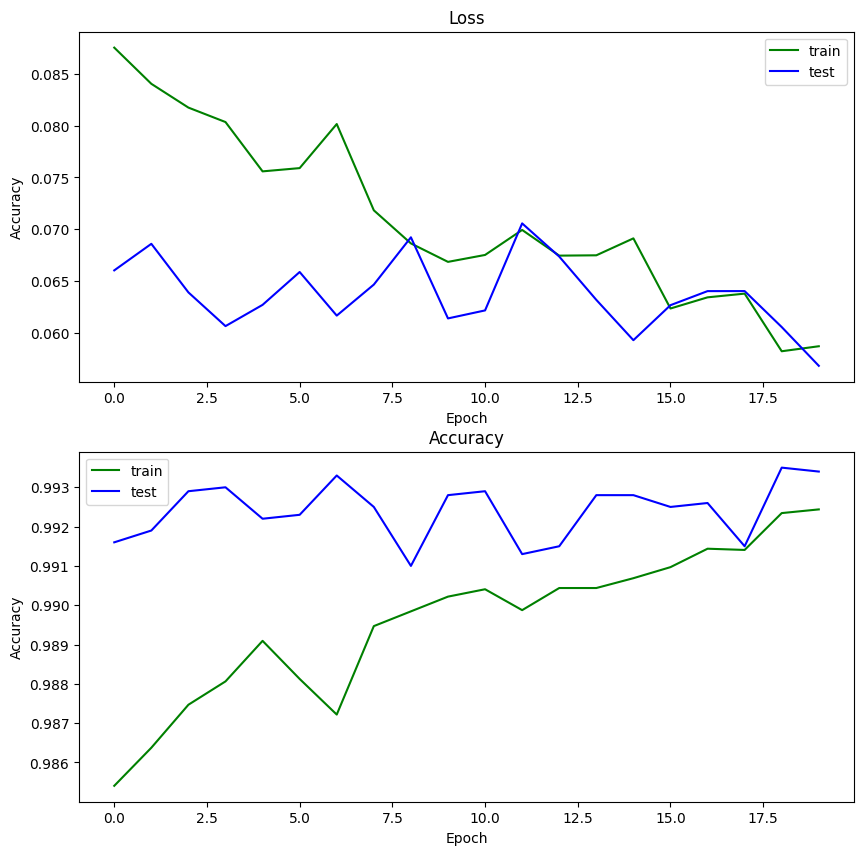

In [ ]:
 plot_model_summary(histories)

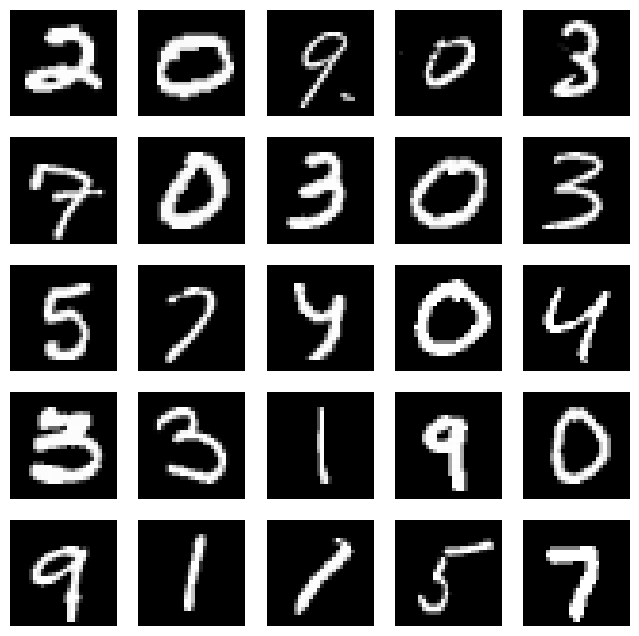

In [ ]:
show_img_grid(test)

In [ ]:
y_hat = [int(label.argmax()) for label in model.predict(test, batch_size=100)]
y_hat = pd.DataFrame({'ImageId': range(1, len(y_hat) + 1), 'Label': y_hat})
y_hat.head()

280/280 [==============================] - 1s 3ms/step


,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3


In [ ]:
y_hat.to_csv('submission.csv', index=False)

In [ ]:
y_hat.shape

(28000, 2)